# Train model

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [127]:
rawx_train=pd.read_csv('https://raw.githubusercontent.com/mmm-pygame/Final-Project-Machine-Learning/refs/heads/main/data/processed/processed_train.csv')
rawy_train=pd.read_csv('https://raw.githubusercontent.com/mmm-pygame/Final-Project-Machine-Learning/refs/heads/main/data/splited/test.csv')

In [128]:
testx=rawy_train.drop(columns=['Survived'])
testy=rawy_train['Survived']

In [129]:
input_y=rawx_train['Survived'].copy()
input_x=rawx_train.drop(columns=['Survived'])

In [130]:
train_x,x_val,train_y,y_val=train_test_split(input_x,input_y,test_size=0.1,random_state=42)

In [131]:
LR=LinearRegression(n_jobs=-1)
LR.fit(train_x,train_y)

trainLRmse=mean_squared_error(train_y,LR.predict(train_x))
valLRmse=mean_squared_error(y_val,LR.predict(x_val))


In [132]:
print(f'Train MSE: {trainLRmse} | Val MSE: {valLRmse}')

Train MSE: 0.14697899763292588 | Val MSE: 0.1329514699601371


In [133]:
n_est_list = [1, 10,25, 50,75, 100]  # Số lượng cây thử nghiệm
train_list = []
val_list = []

for n_est in n_est_list:
    # Khởi tạo mô hình
    model = RandomForestRegressor(
        n_estimators=n_est,
        max_depth=5,
        random_state=42,
        n_jobs=-1
    )

    # Huấn luyện
    model.fit(train_x, train_y)

    # Đánh giá
    trainmse=mean_squared_error(train_y,RF.predict(train_x))
    valmse=mean_squared_error(y_val,RF.predict(x_val))
    train_list.append(trainmse)
    val_list.append(valmse)

    print(f"n_estimators={n_est}, train MSE={trainmse:.2f}, val MSE={valmse:.2f}")

n_estimators=1, train MSE=0.03, val MSE=0.12
n_estimators=10, train MSE=0.03, val MSE=0.12
n_estimators=25, train MSE=0.03, val MSE=0.12
n_estimators=50, train MSE=0.03, val MSE=0.12
n_estimators=75, train MSE=0.03, val MSE=0.12
n_estimators=100, train MSE=0.03, val MSE=0.12


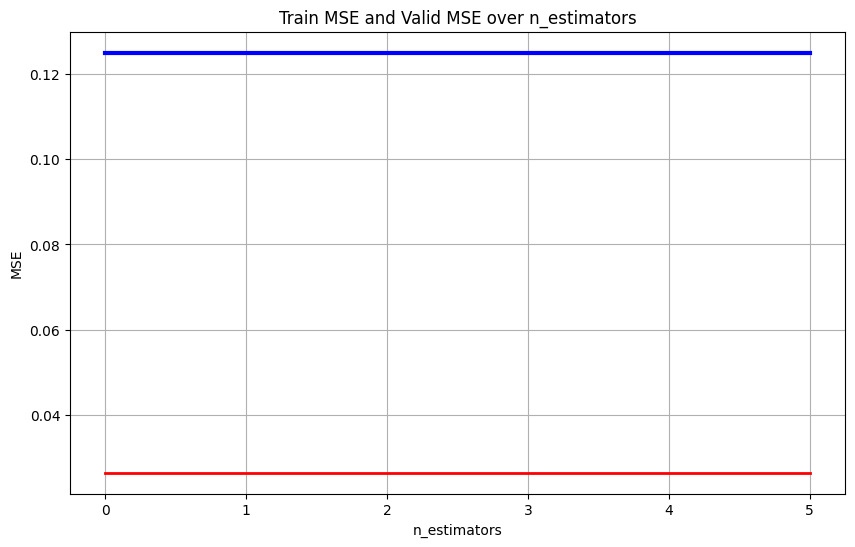

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(train_list,"r-",linewidth=2, label='Train MSE')
plt.plot(val_list,"b-",linewidth=3, label='Validation MSE')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('Train MSE and Valid MSE over n_estimators')
plt.grid(True)
plt.show()

# Analysis

In [135]:
dataforfit=pd.read_csv('https://raw.githubusercontent.com/mmm-pygame/Final-Project-Machine-Learning/refs/heads/main/data/splited/train.csv').drop(columns=['Survived'])

In [136]:
testx.fillna({'Age':-1,'Name':"","Cabin":""},inplace=True)
dataforfit.fillna({'Age':-1,'Name':"","Cabin":""},inplace=True)
testx['FamilySize']=testx['SibSp']+testx['Parch']+1
dataforfit['FamilySize']=testx['SibSp']+testx['Parch']+1
testx['IsAlone']=testx['FamilySize'].apply(lambda x: 1 if x==1 else 0)
dataforfit['IsAlone']=testx['FamilySize'].apply(lambda x: 1 if x==1 else 0)
testx['Missing Age Values']=testx['Age'].apply(lambda x: 1 if x==-1 else 0)
dataforfit['Missing Age Values']=testx['Age'].apply(lambda x: 1 if x==-1 else 0)
testx['Age']= testx['Age'].apply(lambda x: float(x))
dataforfit['Age']= testx['Age'].apply(lambda x: float(x))
testx['IsMale']=testx['Sex'].apply(lambda x: 1 if x=='male' else 0)
dataforfit['IsMale']=testx['Sex'].apply(lambda x: 1 if x=='male' else 0)
testx=testx.drop(columns=['Sex','Name','PassengerId','Cabin','Ticket','Embarked'])
dataforfit=dataforfit.drop(columns=['Sex','Name','PassengerId','Cabin','Ticket','Embarked'])
trans=PowerTransformer(method='yeo-johnson')
for x in testx.drop(columns=['Age','Pclass','IsMale','Missing Age Values']).columns: testx[x]=trans.fit(dataforfit[[x]]).transform(testx[[x]])
scaler = StandardScaler().fit(dataforfit)
data_scaled = scaler.transform(testx)

for x in testx.drop(columns=['Pclass','IsMale','Missing Age Values']).columns: testx[x]=scaler.fit(dataforfit[[x]]).transform(testx[[x]])

In [137]:
finalpredictsLR = LR.predict(testx)
finalpredictsRF = RF.predict(testx)
finalLRmse= mean_squared_error(testy,finalpredictsLR)
finalLRrmse= np.sqrt(finalLRmse)
finalRFmse= mean_squared_error(testy,finalpredictsRF)
finalRFrmse= np.sqrt(finalRFmse)
print(f'RMSE cuối cùng của Linear Regression: {finalLRrmse}')
print(f'RMSE cuối cùng của Random Forest: {finalRFrmse}')

RMSE cuối cùng của Linear Regression: 1.7067865534603994
RMSE cuối cùng của Random Forest: 0.425196618592426


In [138]:
compdf=pd.DataFrame({
    "Dự đoán Linear Regression":finalpredictsLR,
    "Dự đoán Random Forest":finalpredictsRF,
    "Thực tế":testy
})
compdf['Chênh lệch LR']=compdf['Dự đoán Linear Regression']-compdf['Thực tế']
compdf['Chênh lệch RF']=compdf['Dự đoán Random Forest']-compdf['Thực tế']
compdf=compdf.round(0)
print("So sánh 20 giá trị đầu tiên: ")
display(compdf.head(20))

So sánh 20 giá trị đầu tiên: 


,Dự đoán Linear Regression,Dự đoán Random Forest,Thực tế,Chênh lệch LR,Chênh lệch RF
0,2.0,1.0,1,1.0,-0.0
1,1.0,0.0,0,1.0,0.0
2,1.0,0.0,0,1.0,0.0
3,4.0,1.0,1,3.0,-0.0
4,3.0,0.0,1,2.0,-1.0
5,2.0,1.0,1,1.0,-0.0
6,1.0,0.0,1,0.0,-1.0
7,2.0,0.0,0,2.0,0.0
8,2.0,0.0,1,1.0,-1.0
9,3.0,1.0,1,2.0,-0.0


**Mô hình Linear Regression không học được Survived là biến Int có tính chất boolean. Trong khi đó Random Forest dự đoán khá chuẩn chỉ cần đổi kết quả thành Int là được. Nên dùng Random Forest.**